<a href="https://colab.research.google.com/github/kdckdc533/TASK---2-NEXUS/blob/main/DISEASE_PREDICTION_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split

In [2]:
# @title DATA COLLECTION AND LOADING THE DATA
# Load the dataset
data = pd.read_csv('/content/dataset_heart.csv')

print("data shape: ", data.shape)

data shape:  (270, 14)


In [3]:
data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [4]:
data.tail()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [6]:
# @title CHECKING WHETHER THERE CONSISTS OF MISSING VALUES

# checking for missing values
data.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

In [7]:

print(data.columns)


Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')


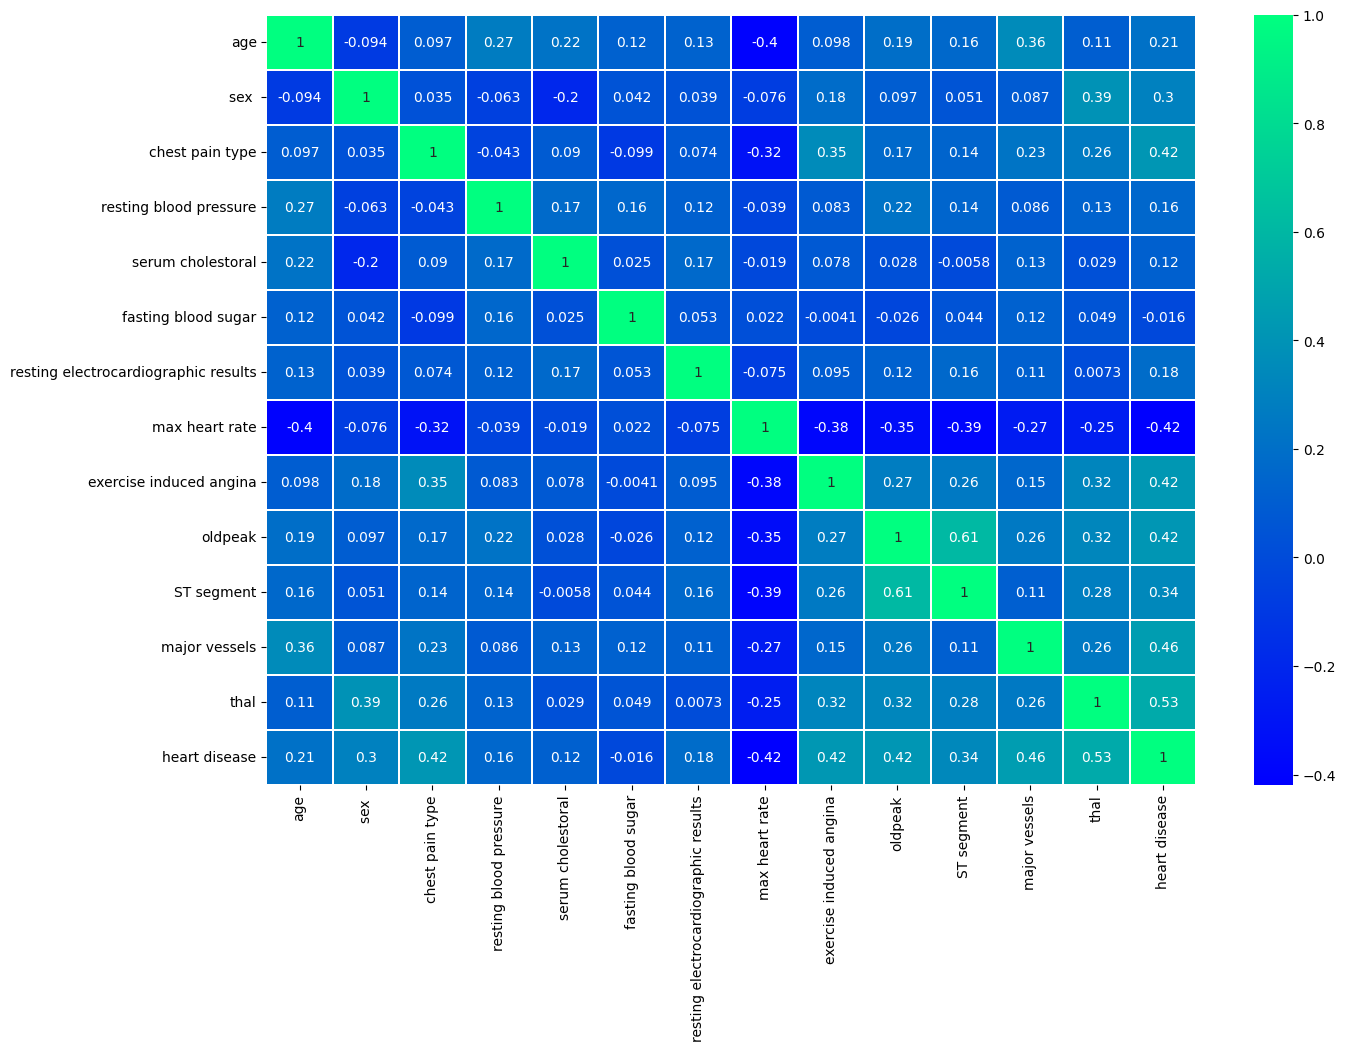

<Figure size 640x480 with 0 Axes>

In [8]:
# @title Correlation Figure
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

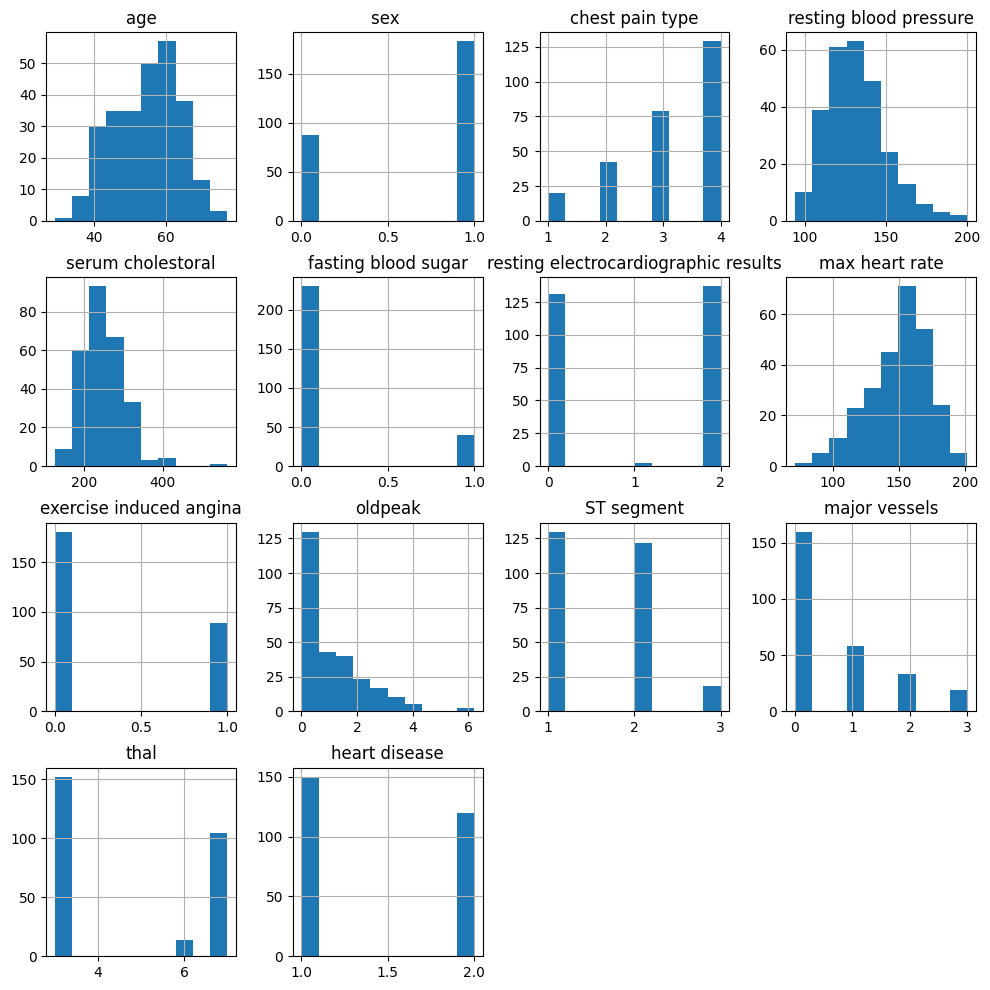

In [9]:
# @title RELATION BETWEEN EACH FEATURE DISTRIBUTION WITH THE HELP OF HISTOGRAM
data.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [10]:
X = data.drop('heart disease', axis=1)
y = data['heart disease']


In [11]:
# @title SPLITTING THE DATASET
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

Split the whole dataset into trainset and testset which contains 75% train and 25% test.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.7794117647058824
Testing Sensitivity for Logistic Regression: 0.7906976744186046
Testing Specificity for Logistic Regression: 0.76
Testing Precision for Logistic Regression: 0.85


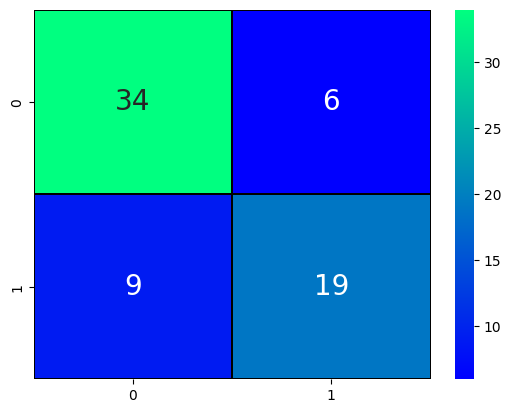

In [12]:
# @title IMPLEMENTING LOGISTIC REGRESSION ALGORITHM
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           1       0.79      0.85      0.82        40
           2       0.76      0.68      0.72        28

    accuracy                           0.78        68
   macro avg       0.78      0.76      0.77        68
weighted avg       0.78      0.78      0.78        68



              precision    recall  f1-score   support

           1       0.87      1.00      0.93        40
           2       1.00      0.79      0.88        28

    accuracy                           0.91        68
   macro avg       0.93      0.89      0.91        68
weighted avg       0.92      0.91      0.91        68

Testing Accuracy for Decision Tree: 0.9117647058823529
Testing Sensitivity for Decision Tree: 0.8695652173913043
Testing Specificity for Decision Tree: 1.0
Testing Precision for Decision Tree: 1.0


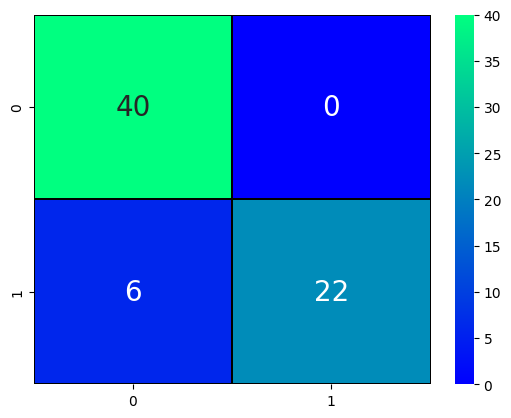

In [14]:
# @title IMPLEMENTING DECISION TREE ALGORITHM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

75.0
Testing Accuracy for Random Forest: 0.75
Testing Sensitivity for Random Forest: 0.7674418604651163
Testing Specificity for Random Forest: 0.72
Testing Precision for Random Forest: 0.825


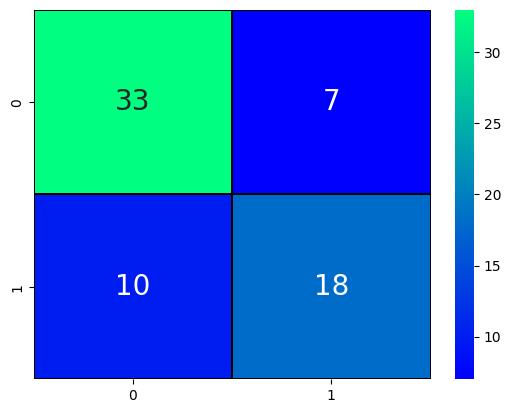

In [17]:
# @title IMPLEMENTING RANDOM FOREST ALGORITHM
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))


In [18]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           1       0.77      0.82      0.80        40
           2       0.72      0.64      0.68        28

    accuracy                           0.75        68
   macro avg       0.74      0.73      0.74        68
weighted avg       0.75      0.75      0.75        68



Testing Accuracy for SVM: 0.7647058823529411
Testing Sensitivity for Random Forest: 0.7857142857142857
Testing Specificity for Random Forest: 0.7307692307692307
Testing Precision for Random Forest: 0.825


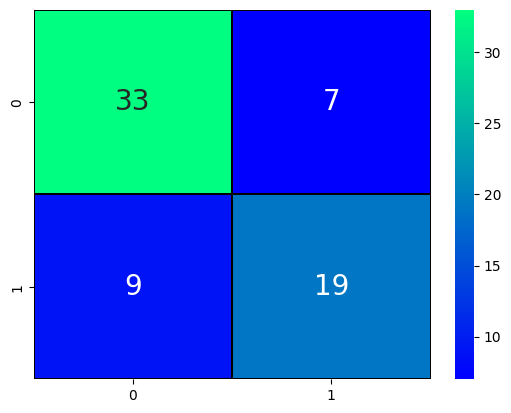

In [20]:
# @title IMPLEMENTING SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [21]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           1       0.79      0.82      0.80        40
           2       0.73      0.68      0.70        28

    accuracy                           0.76        68
   macro avg       0.76      0.75      0.75        68
weighted avg       0.76      0.76      0.76        68



In [23]:
print(tree_model)

DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [25]:
print(tree_model.n_features_in_)
print(input_reshaped.shape[1])

13
7


In [27]:
input=(63,3,145,233,150,2.3,0,34,56,7,88,7,8)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1):
  print("The patient seems to be have heart disease:(")
else:
  print("The patient seems to be Normal:)")

The patient seems to be Normal:)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
